### Analysis of fin data for presense of chaos. Data: BAC for 5 years

Literature:
- DAVID A. HSIEH, [Chaos and Nonlinear Dynamics: Application to Financial Markets](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1991.tb04646.x)
- Charalampos (Haris) SkokosGeorg A. GottwaldJacques Laskar, [Chaos Detection and Predictability](https://link.springer.com/book/10.1007/978-3-662-48410-4)
- Sorin Vlad, Paul Pascu and Nicolae Morariu, [Chaos Models in Economics](https://arxiv.org/pdf/1001.3492.pdf)
- Gencer, Murat and Unal, Gazanfer, [Testing Non-Linear Dynamics, Long Memory and Chaotic Behaviour of Energy Commodities](https://mpra.ub.uni-muenchen.de/74115/)
- E. Peters, "Chaos and Order in the Capital Markets: A New View of Cycles, Prices, and Market Volatility", 2nd Edition, John Wiley & Sons, 1996.


There are several definitions of 'chaos'. E. Peters in “Chaos and Order in the Capital Markets“ defines chaos as "an aperiodic long time behavior developed by a deterministic system highly sensitive on initial condition". 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import statsmodels.tsa.stattools as stat
from tqdm import tqdm, trange, tqdm_notebook
import nolds  # calculation of maximum Lyapunov LE
%matplotlib inline
plt.style.use('ggplot')

Actual data were downloaded as historical from Yahoo finance for BAC, 5 years up to Jan 11th 2019.
They were saved as the CSV file data/BAC-5-years.csv.

See head() and tail() below for an actual range

In [2]:
SRC_CSV = 'data/BAC-5-years.csv'

In [3]:
df = pd.read_csv(SRC_CSV, index_col='Date', parse_dates=['Date'])

In [67]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-14,16.540001,16.77,16.530001,16.77,15.654903,97786600
2014-01-15,17.230000,17.42,17.110001,17.15,16.009636,329333100


In [68]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-10,25.559999,25.780001,25.420000,25.730000,25.730000,65235800
2019-01-11,25.530001,26.040001,25.459999,26.030001,26.030001,63453300


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,20.608816,20.798561,20.404833,20.600374,19.893672,8.467625e+07
std,5.965929,6.012860,5.912037,5.959894,6.139160,3.905448e+07
min,11.460000,11.550000,10.990000,11.160000,10.621818,1.427360e+07
25%,15.780000,15.940000,15.610000,15.790000,14.947576,5.964332e+07
50%,17.370001,17.490000,17.224999,17.355001,16.379292,7.575720e+07
75%,25.299999,25.487500,25.090000,25.257500,24.579963,9.938292e+07
max,32.970001,33.049999,32.639999,32.840000,32.368134,3.750887e+08


**convert Close to 'return' values**

'return' value is a profit for a period. 'close' can be converted to 'return' using formula
ret = (close[i]-close[i+1])/close[i].

See [Wikipedia 'Rate of return'](https://en.wikipedia.org/wiki/Rate_of_return) for the definition of 'return' and why logarithm of 'return' is used instead of 'return'

In [24]:
returns = df.Close.pct_change(1)[1:]
log_returns = np.log(df.Close) - np.log(df.Close.shift(1))
log_returns = log_returns[1:]
log_returns.head(3)

Date
2014-01-15    0.022407
2014-01-16   -0.004090
2014-01-17   -0.004107
Name: Close, dtype: float64

Graphs of the original sequency and log returns

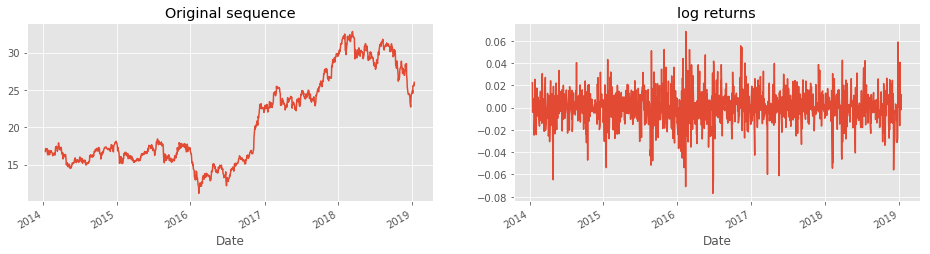

In [9]:
plt.figure(figsize=(16, 8))
ax1 = plt.subplot(221)
df.Close.plot(ax=ax1, title='Original sequence')
ax2 = plt.subplot(222)
log_returns.plot(ax=ax2, title="log returns")

In [10]:
log_returns.describe()

count    1257.000000
mean        0.000350
std         0.016025
min        -0.076961
25%        -0.007745
50%         0.000000
75%         0.009677
max         0.068395
Name: Close, dtype: float64

### Visual estimation of log_returns.

Estimation of PDF using histogram. It similar to normal.

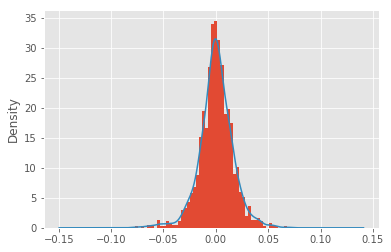

In [16]:
ax = log_returns.hist(bins=50, density=True)
log_returns.plot.kde(ax=ax)

Check that there is no linear dependency from previous values

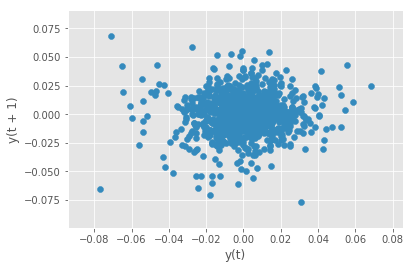

In [45]:
pd.plotting.lag_plot(log_returns)

There is no autocorrelation for different lags.

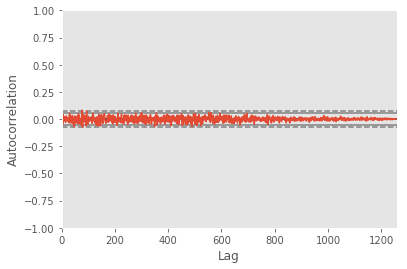

In [47]:
pd.plotting.autocorrelation_plot(log_returns)

### BDS test 

BDS tests the null hypothesis of independent and identical distribution (i.i.d)
or the purpose of detecting non-random chaotic dynamics.

In [61]:
# BDS statistics
bds, pval = stat.bds(log_returns)
bds, pval

(array(5.83391072), array(5.41430999e-09))

BDS is high, pval is less than 0.05. This means that null hypothesis of i.i.d. rejected and the time series has non linear dynamic.

### Augumented Dickey-Fuller test

ADF tests the null hypothesis that time series has unit roots. If the hypothesis rejected, the time-series is stationary.

In [50]:
def adf(series):
    res = sm.adfuller(series)
    print("ADF statistics: {:.3f}".format(res[0]))
    print("p-value: {:.3f}".format(res[1]))
    crit_vals = res[4]
    cv = ['{}:{:.3f}'.format(k, v) for k,v in crit_vals.items()]
    print("critical values: ", cv)

In [38]:
adf(log_returns)

ADF statistics: -14.429
p-value: 0.000
critical values:  ['10%:-2.568', '1%:-3.436', '5%:-2.864']


Because ADF statistics is lower than critical values, the null hypothesis is rejected and time series is stationary.
- [How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/), 
- [Augmented Dickey–Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

### Maximal Lyapunov Exponent

'nolds' package is used to calculate LE.

In [42]:
le = nolds.lyap_e(log_returns)
le, max(le)

(array([ 0.07156784, -0.00065859, -0.07223826, -0.23217343], dtype=float32),
 0.07156784)

The positive value of maximum of LE shows that time-series can be described as a system sensitive to initial conditions.

### Summary:

The system describes the BAC time series is deterministic, aperiodic, and sensitive to initial conditions. This means that the BAC time series has chaotic dynamics.